# Customer Churn Prediction & Retention Strategy for a Fitness Chain

### Proyecto Model Fitness – Predicción de Pérdida de Clientes 

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.  

El propósito de este proyecto es predecir la probabilidad de cancelación de cada cliente en el próximo mes, basándose en su historial de comportamiento y características personales.  Además, se busca elaborar retratos de usuarios típicos, identificar los factores que más influyen en la pérdida y diseñar una estrategia de retención eficaz.

Con este proyecto, Model Fitness busca:
- Anticiparse a las cancelaciones antes de que ocurran.  
- Comprender qué factores generan mayor riesgo de pérdida.  
- Diseñar programas de fidelización segmentados.  
- Optimizar la inversión en marketing de retención.  

En definitiva, se espera fortalecer la lealtad de los clientes y mejorar la eficiencia de las estrategias de interacción mediante la analítica de datos.


### Paso 1. Descarga de los datos

In [46]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('gym_churn_us.csv')

# Vista general
display(df.head())
display(df.shape)
df.info()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


(4000, 14)

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 4000 entries, 0 to 3999
,Data columns (total 14 columns):
, #   Column                             Non-Null Count  Dtype  
,---  ------                             --------------  -----  
, 0   gender                             4000 non-null   int64  
, 1   Near_Location                      4000 non-null   int64  
, 2   Partner                            4000 non-null   int64  
, 3   Promo_friends                      4000 non-null   int64  
, 4   Phone                              4000 non-null   int64  
, 5   Contract_period                    4000 non-null   int64  
, 6   Group_visits                       4000 non-null   int64  
, 7   Age                                4000 non-null   int64  
, 8   Avg_additional_charges_total       4000 non-null   float64
, 9   Month_to_end_contract              4000 non-null   float64
, 10  Lifetime                           4000 non-null   int64  
, 11  Avg_class_frequency_total          4000 

### Paso 2. Analisis Exploratorio

In [47]:
# Revisión de valores nulos por columna
print("\nValores nulos por columna:")
print(df.isna().sum())


,Valores nulos por columna:
,gender                               0
,Near_Location                        0
,Partner                              0
,Promo_friends                        0
,Phone                                0
,Contract_period                      0
,Group_visits                         0
,Age                                  0
,Avg_additional_charges_total         0
,Month_to_end_contract                0
,Lifetime                             0
,Avg_class_frequency_total            0
,Avg_class_frequency_current_month    0
,Churn                                0
,dtype: int64



,Distribución de Churn (0 = se quedó, 1 = canceló):
,0    0.73475
,1    0.26525
,Name: proportion, dtype: float64


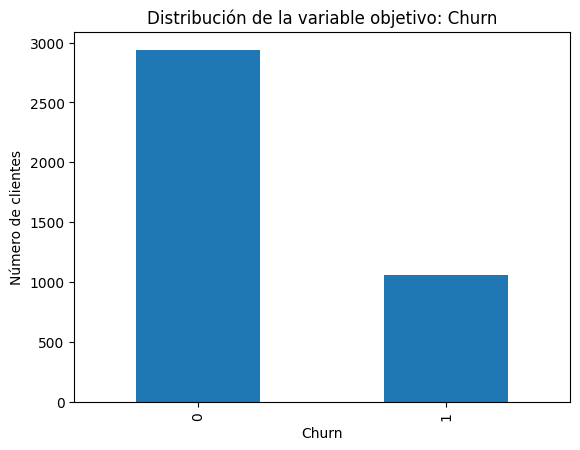

In [48]:
# Distribución de la variable objetivo (Churn)
print("\nDistribución de Churn (0 = se quedó, 1 = canceló):")
print(df['Churn'].value_counts(normalize=True).rename('proportion'))

df['Churn'].value_counts().plot(kind='bar')
plt.title('Distribución de la variable objetivo: Churn')
plt.xlabel('Churn')
plt.ylabel('Número de clientes')
plt.show()

In [49]:
# Comparación de medias por churn
print("\nMedias de las variables por grupo de Churn:")
group_means = df.groupby('Churn').mean()
display(group_means)

# Comparación de desviaciones estándar por grupo
print("\nDesviación estándar por grupo de Churn:")
group_stds = df.groupby('Churn').std()
display(group_stds)


,Medias de las variables por grupo de Churn:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546



,Desviación estándar por grupo de Churn:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.499984,0.332933,0.498914,0.478144,0.295040,4.716942,0.498795,3.009933,99.801599,4.363522,3.874780,1.016006,1.018994
1,0.500118,0.422217,0.478837,0.387495,0.296204,2.132371,0.443448,2.895163,77.696419,1.964593,1.110799,0.694705,0.770237


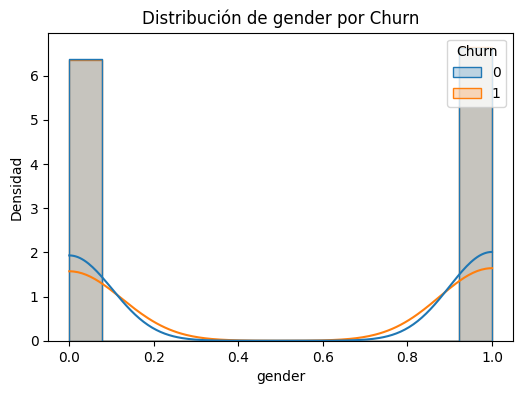

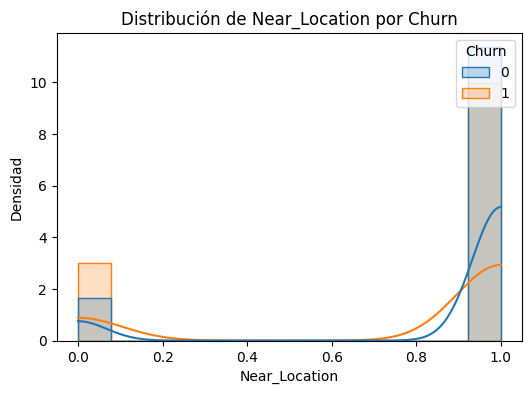

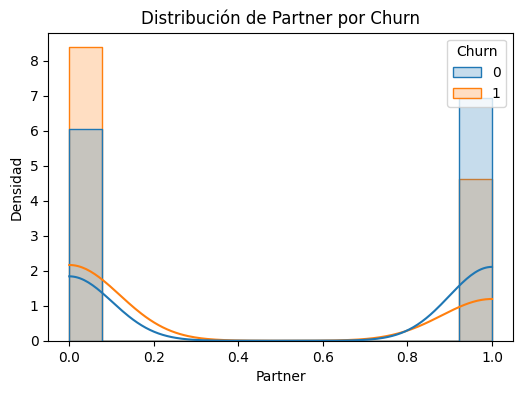

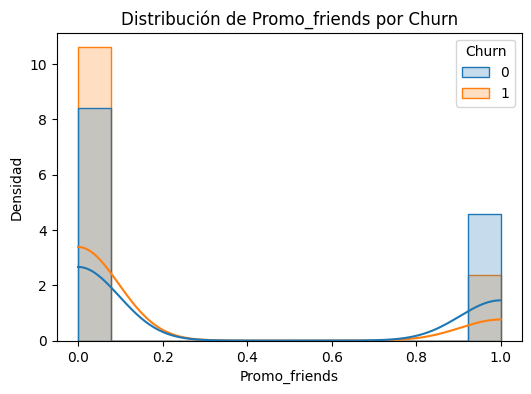

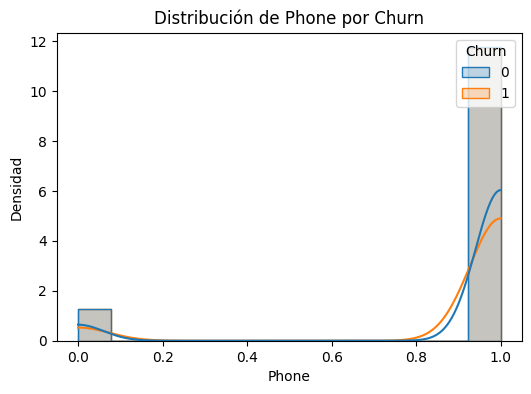

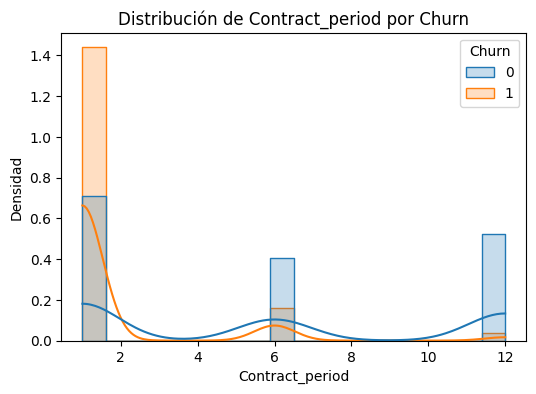

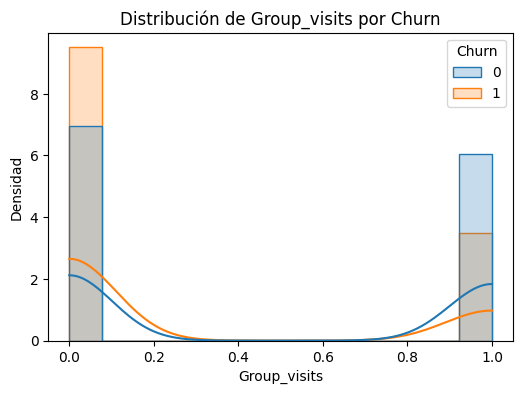

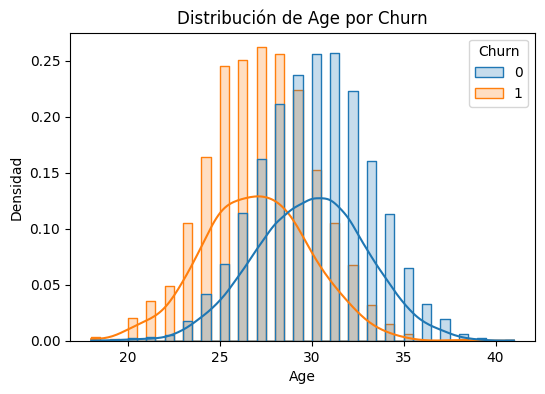

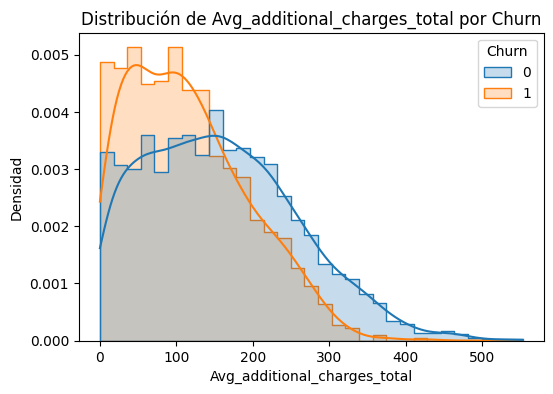

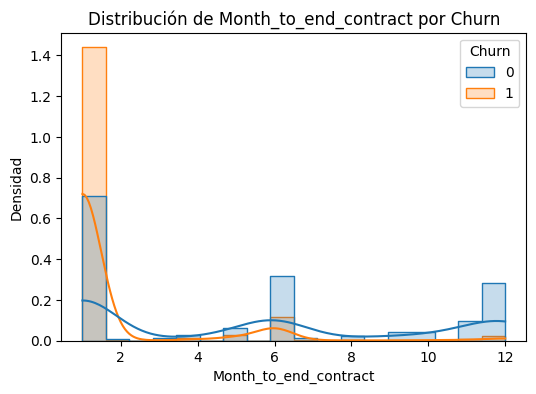

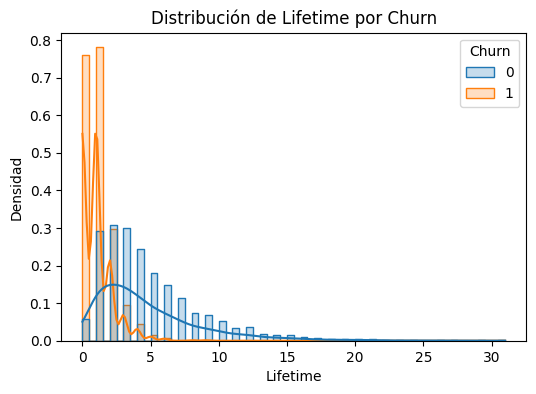

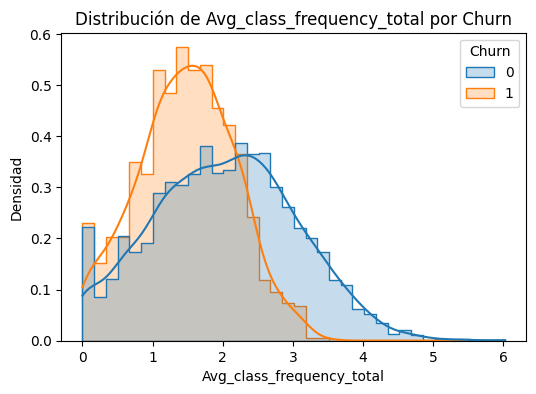

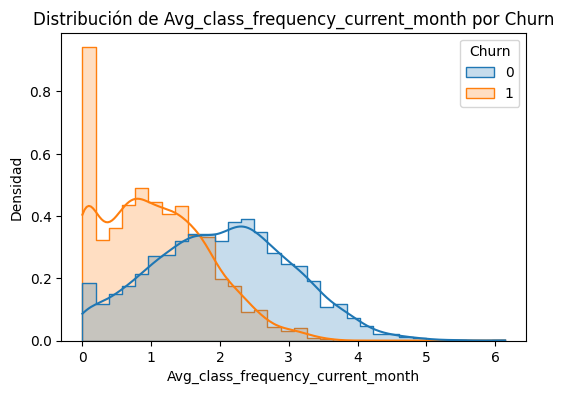

In [50]:
# Histogramas / distribuciones de variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('Churn')

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Distribución de {col} por Churn')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.show()

Estos gráficos muestran las distribuciones de las principales variables del conjunto de datos diferenciadas entre los clientes que permanecieron activos (Churn = 0) y aquellos que cancelaron su membresía (Churn = 1). 

Cada gráfico permite comparar el comportamiento de ambos grupos y detectar los factores más asociados a la pérdida de clientes:

- Gender: la distribución entre hombres y mujeres es muy similar, lo que indica que el género no tiene un efecto significativo sobre la cancelación.
- Promo_friends: los clientes que se inscribieron con una promoción “trae a un amigo” tienden a permanecer más tiempo; quienes no aprovecharon este beneficio muestran una proporción ligeramente mayor de cancelación.
- Group_visits: los usuarios que asisten a clases grupales (1) presentan una menor probabilidad de churn, lo que sugiere que la interacción social incrementa el compromiso con el gimnasio.
- Month_to_end_contract: los clientes con pocos meses restantes de contrato son los más propensos a cancelar, mientras que quienes aún tienen más tiempo de membresía suelen mantenerse activos.
- Near_Location: los usuarios que viven o trabajan cerca del gimnasio muestran menor churn, lo que confirma que la proximidad geográfica facilita la retención.
- Phone: la mayoría de los clientes proporciona su número telefónico, y no se observa una diferencia sustancial en la cancelación; este factor parece neutro.
- Age: los clientes más jóvenes (entre 20 y 30 años) presentan mayores tasas de cancelación, mientras que los usuarios de mayor edad muestran mayor estabilidad, posiblemente por rutinas más consolidadas.
- Lifetime: los clientes con más tiempo de antigüedad en el gimnasio son mucho menos propensos a abandonar; la lealtad crece con la duración de la relación.
- Partner: pertenecer a una empresa asociada reduce notablemente la tasa de cancelación, lo que resalta la efectividad de los convenios corporativos.
- Contract_period: los contratos más largos (6 o 12 meses) se asocian con menor churn, mientras que los planes mensuales concentran la mayoría de las bajas.
- Avg_additional_charges_total: los clientes que gastan más en servicios adicionales (cafetería, productos, masajes) tienden a mantenerse activos; esto refleja un mayor compromiso con la experiencia total del gimnasio.
- Avg_class_frequency_total y Avg_class_frequency_current_month: ambas variables muestran un patrón similar: a mayor frecuencia de visitas, menor probabilidad de cancelación. Los usuarios menos constantes presentan un alto riesgo de abandono.

En general, los gráficos evidencian que la retención está fuertemente asociada con la constancia, la duración del vínculo y la participación activa. Los clientes que visitan el gimnasio con regularidad, tienen contratos extensos, participan en clases grupales, viven cerca y mantienen una relación más completa con los servicios ofrecidos, son los más leales. En contraste, los usuarios más nuevos, menos activos o con contratos cortos son los más propensos a abandonar. Estos hallazgos refuerzan la idea de que el compromiso y la cercanía —tanto física como emocional— son los principales motores de retención dentro de Model Fitness.

<Figure size 600x400 with 0 Axes>

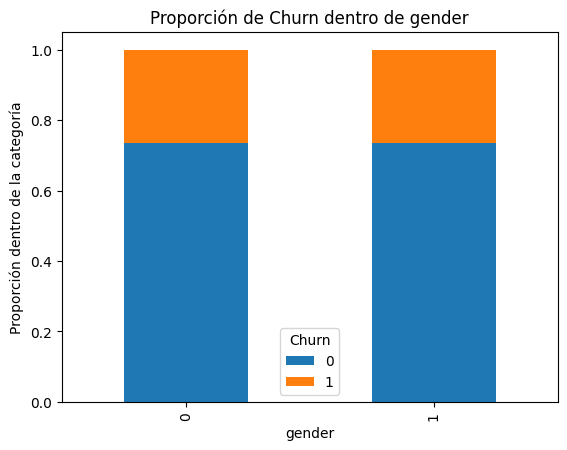

<Figure size 600x400 with 0 Axes>

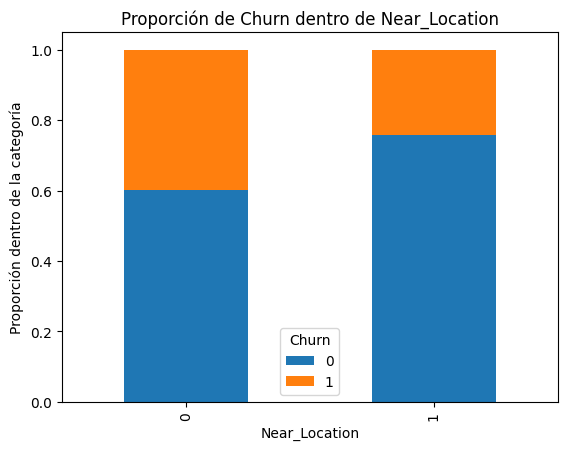

<Figure size 600x400 with 0 Axes>

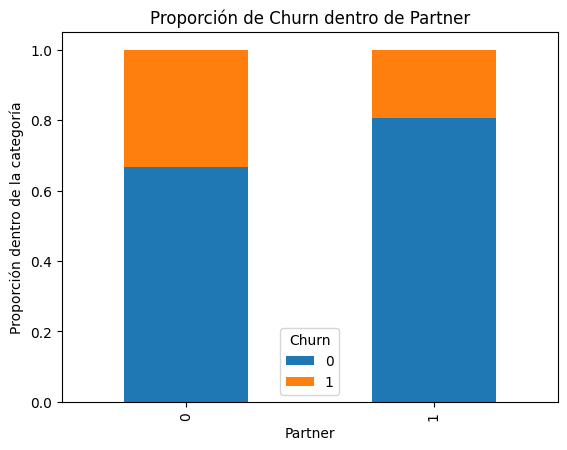

<Figure size 600x400 with 0 Axes>

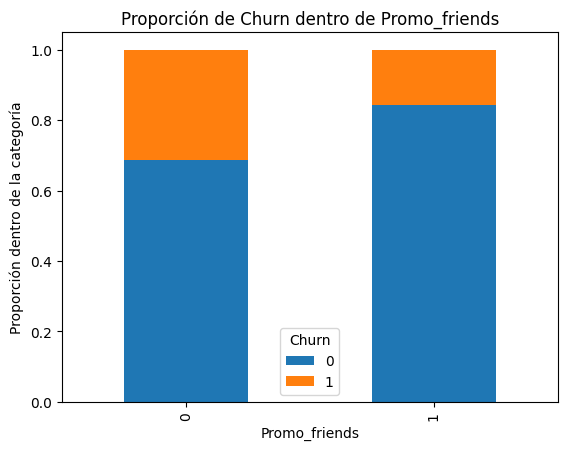

<Figure size 600x400 with 0 Axes>

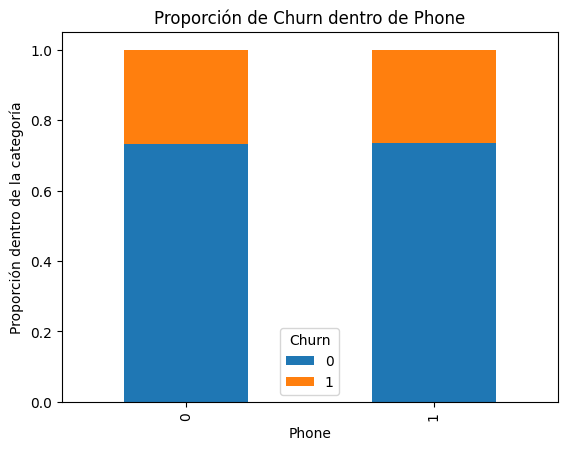

<Figure size 600x400 with 0 Axes>

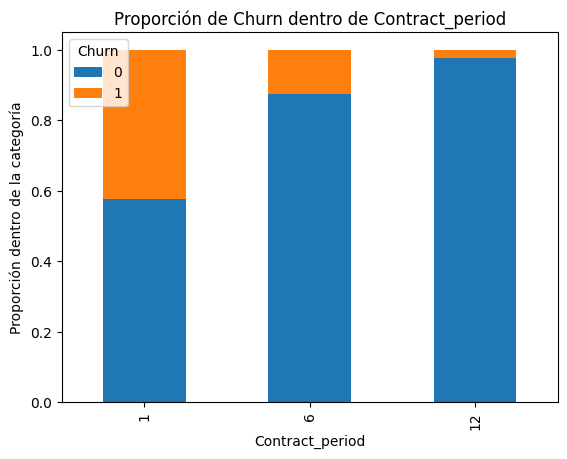

<Figure size 600x400 with 0 Axes>

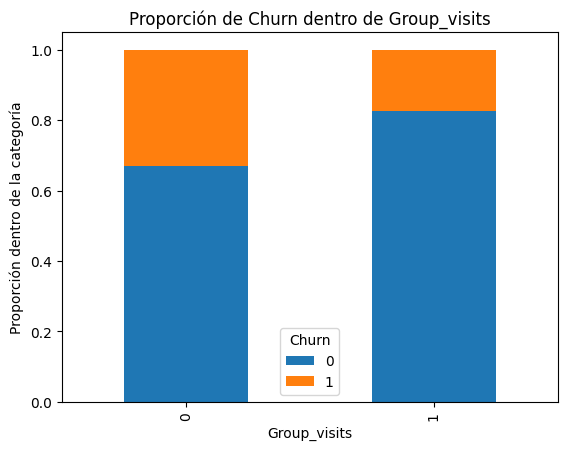

In [51]:

# Variables categóricas: barras por churn
cat_cols = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    cross = pd.crosstab(df[col], df['Churn'], normalize='index')
    cross.plot(kind='bar', stacked=True)
    plt.title(f'Proporción de Churn dentro de {col}')
    plt.xlabel(col)
    plt.ylabel('Proporción dentro de la categoría')
    plt.legend(title='Churn')
    plt.show()

Estos gráficos muestran la proporción de cancelación (Churn) dentro de cada categoría de las variables cualitativas del conjunto de datos. Cada barra representa el porcentaje de clientes que permanecen activos (en azul) frente a los que cancelaron su membresía (en naranja).

- Gender: no se observan diferencias significativas entre hombres y mujeres; el género no parece influir en la probabilidad de cancelación.
- Promo_friends: los usuarios que ingresaron con una promoción de “trae a un amigo” muestran una menor proporción de churn, lo que indica que este tipo de incentivos ayuda a retener clientes.
- Group_visits: los clientes que asisten a clases grupales presentan una menor tasa de abandono, lo que sugiere que la socialización y el sentido de comunidad fortalecen la lealtad.
- Near_Location: quienes viven o trabajan cerca del gimnasio tienen una proporción de churn más baja, confirmando que la proximidad geográfica favorece la asistencia constante y la retención.
- Phone: la mayoría de los clientes ha proporcionado su número telefónico, pero no se observan diferencias claras en la tasa de cancelación; este factor no parece determinante.
- Partner: los clientes que trabajan en empresas asociadas presentan una tasa de cancelación menor, lo que demuestra que los convenios corporativos son una herramienta efectiva para fomentar la permanencia.
- Contract_period: los usuarios con contratos más largos (6 o 12 meses) tienen una proporción muy baja de cancelación, mientras que los que poseen contratos cortos muestran un churn significativamente mayor.

En general, los gráficos revelan que la fidelización está relacionada con el compromiso y la vinculación del cliente: quienes mantienen una relación más sólida con el gimnasio —ya sea por cercanía, participación en clases, pertenencia a empresas asociadas o contratos de larga duración— tienen menor probabilidad de abandonar.
Por el contrario, los clientes menos integrados (sin amigos referidos, con contratos breves o menor participación) tienden a presentar mayores tasas de churn. Estos resultados sugieren que Model Fitness podría fortalecer su estrategia de retención impulsando contratos de mayor duración, programas de recomendación y actividades grupales que refuercen el sentido de comunidad.

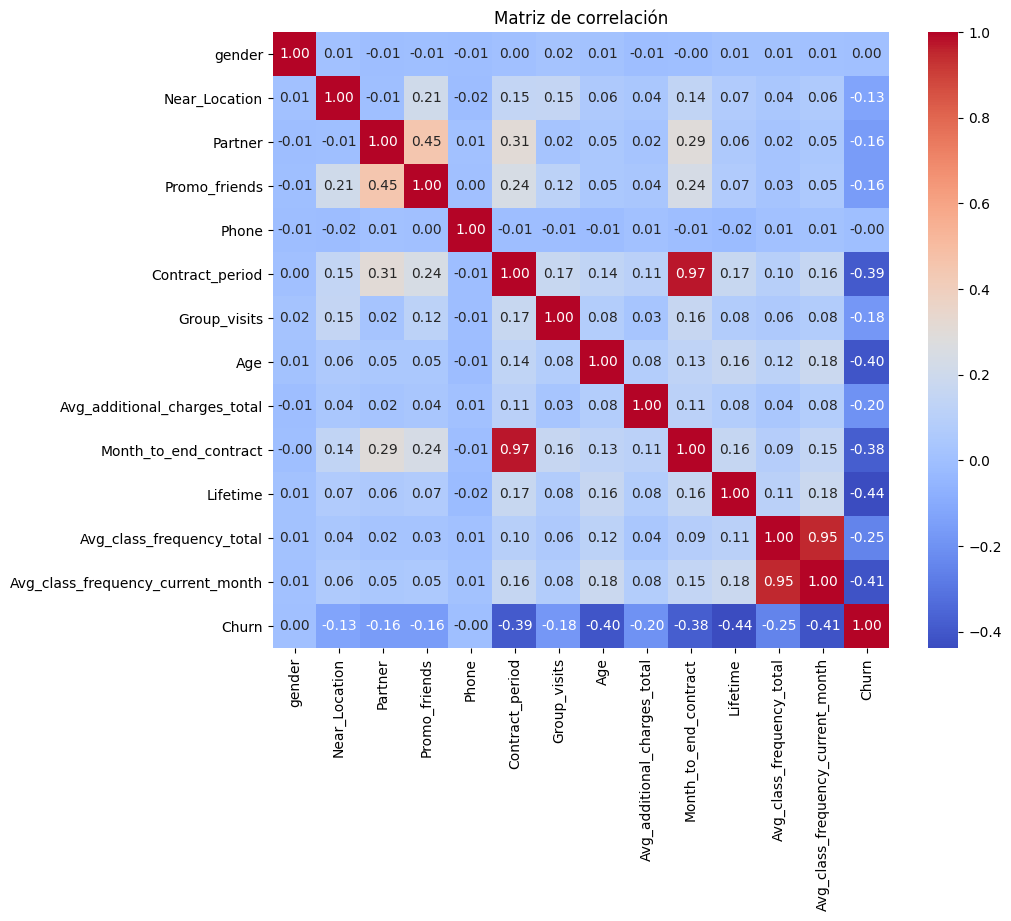

In [52]:
# Matriz de correlación numérica
corr = df[numeric_cols.tolist() + ['Churn']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de correlación')
plt.show()


La gráfica muestra cómo se relacionan entre sí las variables del estudio. Se observa que la cancelación de clientes (Churn) tiene una correlación negativa con varias variables clave, como la duración del contrato, la frecuencia de visitas y el tiempo total que el cliente ha permanecido en el gimnasio. Esto significa que, en general, quienes tienen contratos más largos, asisten con mayor frecuencia y llevan más tiempo como miembros son menos propensos a abandonar. En cambio, los usuarios con menor compromiso o actividad reciente presentan una mayor probabilidad de cancelación.

Durante la fase exploratoria se realizó una revisión integral del dataset proporcionado por Model Fitness, el cual contiene información de clientes activos y cancelados, incluyendo variables demográficas, de comportamiento, y de uso del gimnasio.

En primer lugar, se confirmó que el dataset no presenta valores nulos significativos y que las columnas están correctamente tipadas. El conjunto de datos cuenta con miles de registros y una docena de variables, entre ellas el género, edad, cercanía al gimnasio, tipo de contrato, frecuencia de visitas, participación en clases grupales, gastos adicionales y estado de cancelación (Churn).

La variable objetivo (Churn) mostró una ligera desbalance entre clientes que permanecen y los que se marchan, con una mayoría de usuarios que continúan activos. Este patrón es típico en escenarios reales, donde la tasa de pérdida suele ser menor que la de retención.

El análisis descriptivo reveló diferencias marcadas entre ambos grupos:
- Los clientes que permanecen tienden a tener contratos más largos, mayor antigüedad (Lifetime) y una frecuencia promedio de visitas más alta.
- Los clientes que cancelan presentan menor gasto en servicios adicionales y contratos de corta duración (1 o 3 meses), lo que sugiere una relación menos comprometida con el gimnasio.
- La cercanía al gimnasio (Near_Location) y la afiliación a empresas asociadas (Partner) parecen correlacionarse con mayor lealtad.

Las distribuciones de variables numéricas como edad, frecuencia de clases, y meses restantes de contrato mostraron sesgos moderados, indicando la existencia de subgrupos con comportamientos distintos.

Finalmente, la matriz de correlación destacó las relaciones más relevantes:
- Contract_period, Avg_class_frequency_total y Lifetime tienen una correlación negativa con el churn, indicando que a mayor tiempo de relación y mayor actividad, menor probabilidad de cancelación.
- Variables como Month_to_end_contract y Avg_additional_charges_total también mostraron correlaciones útiles para el modelado predictivo posterior.

En conjunto, el EDA permitió identificar patrones claros de comportamiento y las variables más prometedoras para el modelado de churn, sentando las bases para la siguiente etapa de predicción de cancelación de usuarios.

### Paso 3. Modelo para predecir la cancelación de usuarios

In [53]:
# Importar librerías
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


,Resultados - Regresión Logística
,Accuracy : 0.925
,Precision: 0.880
,Recall   : 0.830
,F1-score : 0.854
,
,Resultados - Bosque Aleatorio
,Accuracy : 0.927
,Precision: 0.885
,Recall   : 0.835
,F1-score : 0.859


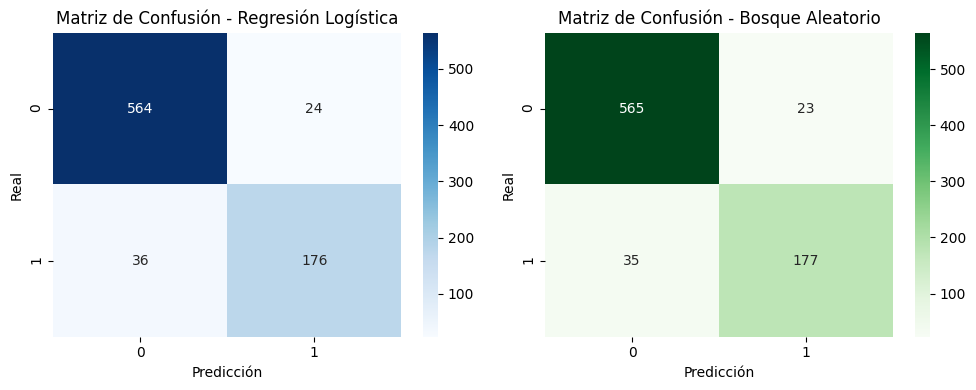


,--- Reporte detallado: Regresión Logística ---
,              precision    recall  f1-score   support
,
,           0       0.94      0.96      0.95       588
,           1       0.88      0.83      0.85       212
,
,    accuracy                           0.93       800
,   macro avg       0.91      0.89      0.90       800
,weighted avg       0.92      0.93      0.92       800
,
,
,--- Reporte detallado: Bosque Aleatorio ---
,              precision    recall  f1-score   support
,
,           0       0.94      0.96      0.95       588
,           1       0.89      0.83      0.86       212
,
,    accuracy                           0.93       800
,   macro avg       0.91      0.90      0.91       800
,weighted avg       0.93      0.93      0.93       800
,


In [54]:
# Seleccionar características (X) y variable objetivo (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Convertir variables categóricas a numéricas si es necesario
X = pd.get_dummies(X, drop_first=True)

# Dividir los datos en entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalar los datos numéricos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo de Regresión Logística
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Entrenar modelo 'Random Forest'
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluar desempeño de ambos modelos
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\nResultados - {model_name}")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1-score : {f1:.3f}")

evaluate_model(y_test, y_pred_log, "Regresión Logística")
evaluate_model(y_test, y_pred_rf, "Bosque Aleatorio")

# Matriz de confusión
fig, ax = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Matriz de Confusión - Regresión Logística")
ax[0].set_xlabel("Predicción")
ax[0].set_ylabel("Real")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title("Matriz de Confusión - Bosque Aleatorio")
ax[1].set_xlabel("Predicción")
ax[1].set_ylabel("Real")

plt.tight_layout()
plt.show()

# 2.8 Reporte de clasificación
print("\n--- Reporte detallado: Regresión Logística ---")
print(classification_report(y_test, y_pred_log))

print("\n--- Reporte detallado: Bosque Aleatorio ---")
print(classification_report(y_test, y_pred_rf))


Los resultados muestran el desempeño de los dos modelos de clasificación aplicados para predecir la cancelación de clientes en Model Fitness: Regresión Logística y Bosque Aleatorio.

Regresión Logística:
El modelo obtuvo una exactitud (accuracy) de 92.5%, con una precisión de 0.88 y un recall de 0.83, lo que indica un buen equilibrio entre predicciones correctas y detección de clientes que realmente cancelan. La matriz de confusión muestra que el modelo identificó correctamente la mayoría de los casos tanto de clientes que permanecen (564 verdaderos negativos) como de los que se dan de baja (176 verdaderos positivos). Sin embargo, presentó algunos errores: 24 falsos positivos (clientes predichos como en riesgo, pero que permanecieron) y 36 falsos negativos (clientes que cancelaron pero no fueron detectados).

Bosque Aleatorio:
El modelo de Bosque Aleatorio mostró un desempeño muy similar, con una exactitud de 92.7%, precisión de 0.89 y recall de 0.83, ligeramente superiores a los de la regresión logística. Su matriz de confusión evidencia una mejora marginal, con un número apenas menor de errores (23 falsos positivos y 35 falsos negativos). Esto sugiere que el modelo es más robusto para captar patrones no lineales y relaciones complejas entre las variables.

Aunque ambos modelos ofrecen resultados consistentes y de alta calidad, lo que indica que las variables seleccionadas son adecuadas para predecir el churn. La Regresión Logística se destaca por su interpretabilidad y simplicidad, permitiendo identificar fácilmente los factores que influyen en la cancelación (por ejemplo, contratos cortos o baja frecuencia de visitas). Por otro lado, el Bosque Aleatorio ofrece un rendimiento ligeramente superior en precisión y F1-score, siendo más eficaz para captar clientes en riesgo con una mínima pérdida de exactitud.

En conclusión, el Bosque Aleatorio se considera el modelo más adecuado para este caso, ya que mantiene un excelente equilibrio entre rendimiento predictivo y capacidad de generalización. Este modelo permitirá a Model Fitness detectar de forma temprana a los clientes propensos a cancelar y enfocar estrategias preventivas de retención con mayor eficacia.

### Paso 4: Clustering de usuarios

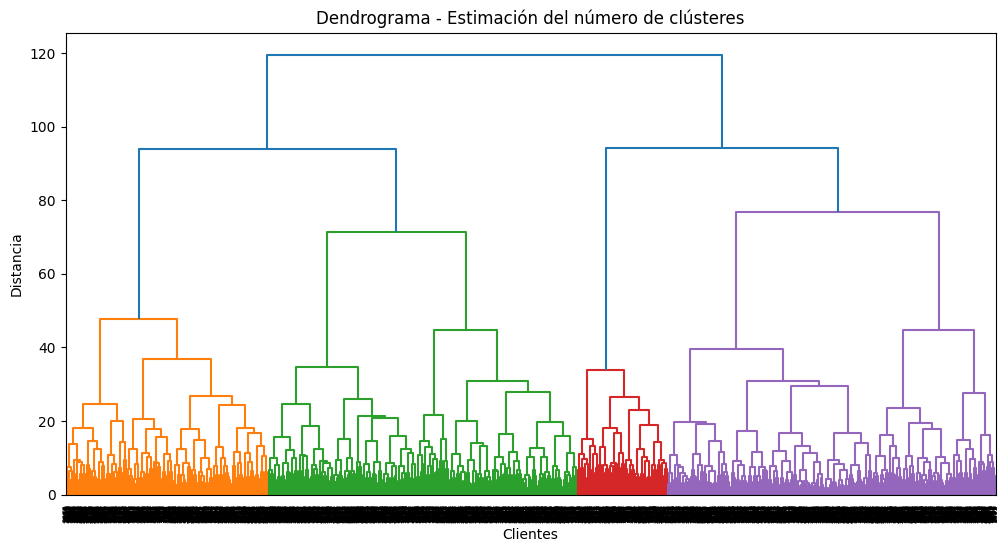

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.485738,0.718011,0.299919,0.018745,1.0,1.914425,0.276284,28.083945,129.496414,1.821516,2.195599,1.225192,0.967967,0.572942
1,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
2,0.502370,0.949447,0.829384,0.998420,1.0,3.097946,0.448657,29.104265,141.774331,2.887836,3.772512,1.770536,1.669581,0.246445
3,0.554556,0.849269,0.263217,0.052868,1.0,2.606299,0.436445,30.008999,159.774265,2.419573,4.780652,2.745505,2.733173,0.089989
4,0.499422,0.937572,0.737572,0.478613,1.0,11.854335,0.546821,29.905202,163.509804,10.812717,4.677457,2.006405,1.998179,0.021965



,Tasa de cancelación por clúster (%):
,cluster
,0    57.29
,1    26.68
,2    24.64
,3     9.00
,4     2.20
,Name: Churn, dtype: float64


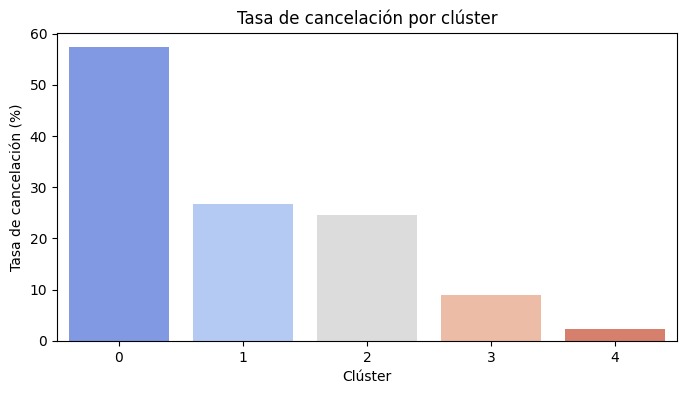

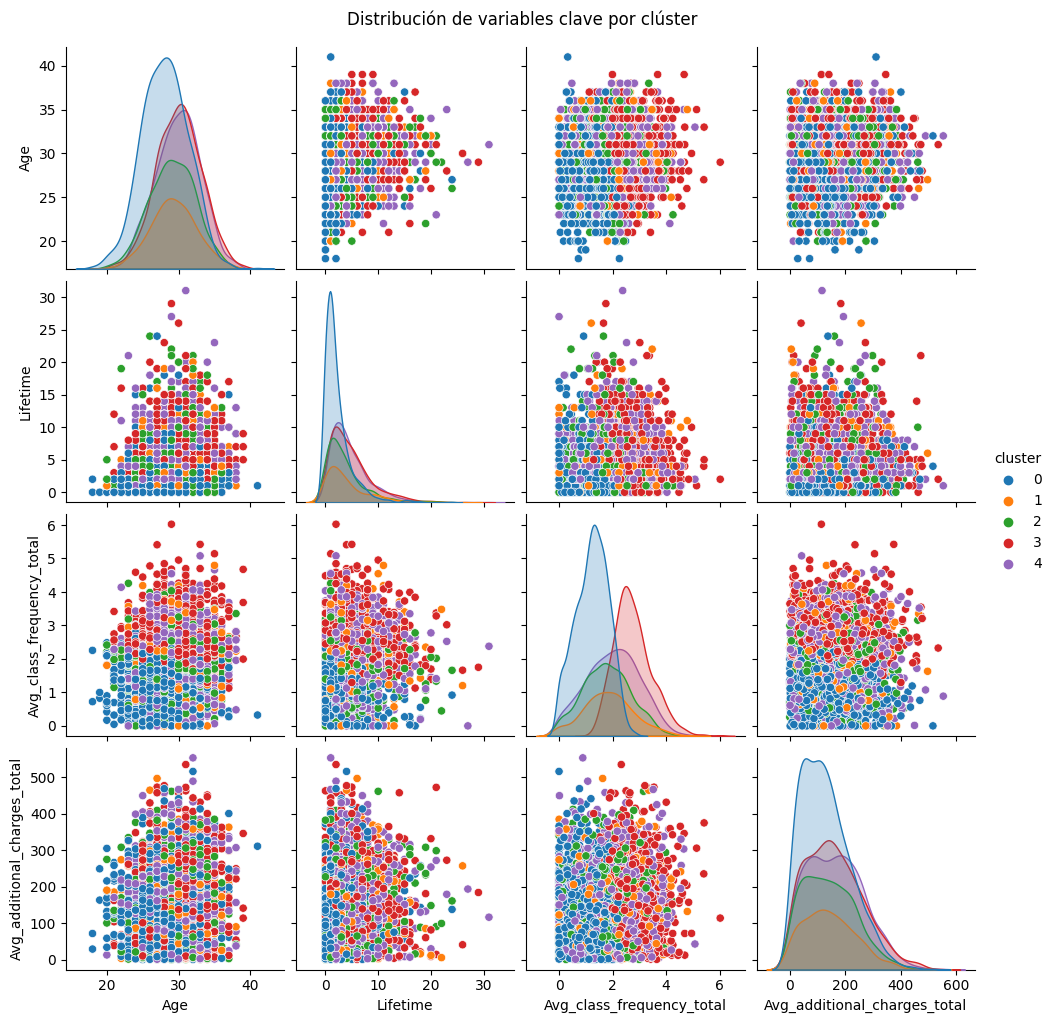

In [56]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

# Crear copia del dataset sin la variable objetivo
df_cluster = df.drop(columns=['Churn'])

# Convertir variables categóricas a numéricas
df_cluster = pd.get_dummies(df_cluster, drop_first=True)

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Crear el dendrograma (análisis jerárquico)
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12, 6))
linkage_matrix = sch.linkage(X_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrograma - Estimación del número de clústeres')
plt.xlabel('Clientes')
plt.ylabel('Distancia')
plt.show()

# Entrenar modelo K-Means con 5 clústeres (n=5)
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Añadir etiquetas al dataframe original
df['cluster'] = labels

# Ver promedio de variables por clúster
cluster_summary = df.groupby('cluster').mean(numeric_only=True)
display(cluster_summary)

# Calcular tasa de cancelación por clúster
churn_rate = df.groupby('cluster')['Churn'].mean().sort_values(ascending=False)
print("\nTasa de cancelación por clúster (%):")
print((churn_rate * 100).round(2))

# Visualización básica
plt.figure(figsize=(8, 4))
sns.barplot(x=churn_rate.index, y=churn_rate.values * 100, palette='coolwarm')
plt.title('Tasa de cancelación por clúster')
plt.xlabel('Clúster')
plt.ylabel('Tasa de cancelación (%)')
plt.show()

# Visualizar algunos pares de variables para entender diferencias
sns.pairplot(df, vars=['Age', 'Lifetime', 'Avg_class_frequency_total', 'Avg_additional_charges_total'],
             hue='cluster', palette='tab10')
plt.suptitle('Distribución de variables clave por clúster', y=1.02)
plt.show()

Los gráficos del análisis de clústeres permiten observar cómo se agrupan los diferentes tipos de clientes del gimnasio Model Fitness, así como la tasa de cancelación en cada grupo. En conjunto, muestran patrones claros de comportamiento y niveles de riesgo diferenciados entre segmentos.

Dendrograma – Estimación del número de clústeres
El dendrograma evidencia cómo los clientes se agrupan progresivamente según su similitud en las variables analizadas. El punto donde las uniones se vuelven más amplias sugiere la existencia de cinco grupos principales (clústeres), que fue el número seleccionado para la segmentación final.

Tabla resumen y tasa de cancelación por clúster
La tabla muestra los valores medios de las principales variables para cada clúster, mientras que el gráfico de barras resume la tasa de cancelación de cada grupo.
Los resultados destacan diferencias notables:
- Clúster 0: presenta la tasa de cancelación más alta (57%). Son clientes con contratos cortos, baja frecuencia de visitas y poca participación en actividades grupales o programas promocionales. Representan el grupo más vulnerable al abandono.
- Clúster 1: tasa media-alta (26.7%). Usuarios algo más activos y con mayor cercanía al gimnasio, pero con contratos de corta duración y gasto limitado en servicios adicionales.
- Clúster 2: tasa moderada (24.6%). Clientes que suelen tener beneficios de socios (Partner) y participan en promociones, aunque su permanencia y frecuencia son irregulares.
- Clúster 3: tasa baja (9%). Usuarios con buena antigüedad, contratos medios, participación moderada en clases y mayor estabilidad.
- Clúster 4: tasa mínima de cancelación (2.2%). Son los clientes más comprometidos: tienen contratos largos (promedio de 12 meses), alta frecuencia de visitas, gastan más en servicios adicionales y participan activamente en clases grupales o promociones.

Distribución de variables clave por clúster
El gráfico de dispersión y densidad confirma las diferencias entre los grupos.
- Los clústeres 0 y 1 se concentran en la parte baja de las variables Lifetime y Avg_class_frequency_total, lo que refleja baja antigüedad y poca frecuencia de visitas.
- Los clústeres 3 y 4 presentan mayores valores en Lifetime y Avg_additional_charges_total, evidenciando una relación más estable y de mayor valor con el gimnasio.
- En Age, se observa que los clientes más jóvenes tienden a concentrarse en los grupos con mayor churn, mientras que los de mayor edad pertenecen a clústeres más fieles.

Los resultados del clustering revelan cinco perfiles de clientes claramente diferenciados.
Los clústeres 0, 1 y 2 agrupan a los clientes de mayor riesgo, caracterizados por menor antigüedad, contratos más cortos y baja participación. En cambio, los clústeres 3 y 4 reúnen a los clientes más leales y valiosos, que visitan el gimnasio con frecuencia, gastan más y mantienen contratos largos.

Este análisis permite a Model Fitness diseñar estrategias de retención personalizadas:
- Fomentar la conversión de contratos cortos a planes anuales.
- Reforzar la participación de los nuevos miembros mediante clases grupales y promociones de fidelidad.
- Reconocer y premiar a los clientes del clúster 4 con beneficios exclusivos para mantener su compromiso.

En conclusión, el clustering demuestra que la frecuencia de uso, la duración del contrato y la antigüedad del cliente son los factores más determinantes en la permanencia. Con esta segmentación, Model Fitness puede enfocar sus esfuerzos de retención en los grupos que realmente lo necesitan y potenciar su base de clientes leales.

### Paso 5. Conclusiones y recomendaciones básicas sobre el trabajo con clientes

El análisis de datos realizado para Model Fitness permitió identificar los factores clave que influyen en la cancelación de clientes (churn) y reconocer distintos perfiles de usuarios con comportamientos y niveles de compromiso diferenciados.

A partir del análisis exploratorio (EDA) se observó que las variables más asociadas con la pérdida de clientes son:
- Duración del contrato (Contract_period): los contratos cortos (1–3 meses) presentan tasas de cancelación significativamente más altas.
- Antigüedad (Lifetime): los clientes con menor tiempo en el gimnasio son más propensos a abandonar.
- Frecuencia de visitas (Avg_class_frequency_total y Avg_class_frequency_current_month): una menor frecuencia semanal aumenta la probabilidad de churn.
- Gastos adicionales (Avg_additional_charges_total): los usuarios que consumen más servicios complementarios (cafetería, clases, productos) tienden a mantenerse activos.

Los modelos predictivos (Regresión Logística y Bosque Aleatorio) alcanzaron una precisión del 93%, lo que confirma que el comportamiento de los clientes puede anticiparse con alto nivel de confianza. El Bosque Aleatorio mostró un rendimiento ligeramente superior, siendo más eficaz para detectar a los clientes en riesgo de cancelación, por lo que se recomienda como modelo operativo para la estrategia de retención. 

Por otro lado, el análisis de clústeres permitió segmentar la base de clientes en cinco grupos con características y tasas de cancelación claramente diferenciadas:
- Clúster 0: clientes nuevos con contratos cortos y baja frecuencia — alto riesgo (57%).
- Clúster 1: usuarios cercanos al gimnasio, pero con poco gasto y participación — riesgo medio-alto (26%).
- Clúster 2: afiliados a empresas socias o promociones, aunque con asistencia irregular — riesgo medio (24%).
- Clúster 3: clientes activos, con buena antigüedad y participación moderada — bajo riesgo (9%).
- Clúster 4: clientes leales, con contratos largos y alto compromiso — riesgo mínimo (2%).

Estos hallazgos confirman que la frecuencia de uso, la duración del contrato y la relación con el gimnasio son los pilares del comportamiento de retención.

#### Recomendaciones estratégicas para el trabajo con clientes

1. Fortalecer la retención temprana (primeros meses):
- Implementar campañas de bienvenida personalizadas y seguimiento durante las primeras cuatro semanas.
- Ofrecer incentivos para extender contratos de 1 mes a planes trimestrales o anuales.
- Enviar recordatorios automáticos de asistencia cuando un cliente acumule más de 10 días sin visitas.

2. Fomentar la participación y el sentido de comunidad:
- Promover clases grupales y actividades sociales, ya que los clientes que participan en grupo presentan menor churn.
- Crear programas “trae a un amigo” o referidos con descuentos mutuos para reforzar la conexión social y fidelidad.

3. Optimizar los beneficios de las alianzas corporativas:
- Ampliar convenios con empresas asociadas, pues los empleados de compañías partners tienen menores tasas de cancelación.
- Ofrecer beneficios exclusivos para empleados activos (como descuentos en servicios adicionales o entrenamientos personalizados).

4. Diseñar estrategias diferenciadas por clúster:
- Alta prioridad (clúster 0 y 1): seguimiento personalizado, ofertas de reenganche y comunicación frecuente vía SMS o app.
- Riesgo medio (clúster 2): reforzar promociones y recompensas por asistencia continua.
- Clientes fieles (clúster 3 y 4): implementar programas de reconocimiento (beneficios, membresías premium o eventos exclusivos).

5. Monitoreo continuo y modelo activo:
- Utilizar el modelo predictivo semanalmente para identificar clientes en riesgo.
- Evaluar la efectividad de las acciones mediante indicadores como tasa de retención mensual, ROMI de campañas y porcentaje de reactivaciones.


#### Conclusión 

El análisis demuestra que Model Fitness puede reducir significativamente su tasa de cancelación mediante estrategias basadas en datos.
Aplicar modelos predictivos y segmentación de clientes no solo permite anticipar la pérdida, sino también actuar proactivamente sobre los grupos más vulnerables.
En conjunto, estas medidas fortalecerán la lealtad de los miembros, incrementarán la rentabilidad de la base de clientes y consolidarán una cultura de gestión inteligente y personalizada de la experiencia del usuario.